# Auto_Insurance_Fraud Analysis

The project aims at predicting which claims are fraudulent

### Data Dictionary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data 

In [3]:
df=pd.read_csv("insurance_claims.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


## Explaratory Data Analysis 

In [4]:
# Check on the information of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

 Notice column of authorities involved has less data and colum _c39 has no data 

In [5]:
# Drop column _c39
df.drop("_c39",inplace=True, axis=1)

In [6]:
##Check on column 'authorities_contacted'
df["authorities_contacted"].head()

0    Police
1    Police
2    Police
3    Police
4       NaN
Name: authorities_contacted, dtype: object

In [7]:
## authorities_contacted column has NaN Values and is an object dtype.We can replace the NaN with the mode value 
df["authorities_contacted"] = df["authorities_contacted"].fillna(df["authorities_contacted"].value_counts().index[0])
df["authorities_contacted"]

0      Police
1      Police
2      Police
3      Police
4      Police
        ...  
995      Fire
996      Fire
997    Police
998     Other
999    Police
Name: authorities_contacted, Length: 1000, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
## Replace the ? in the data frame 
df= df.replace('?',np.nan)

**Check on Missing Values**

In [10]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

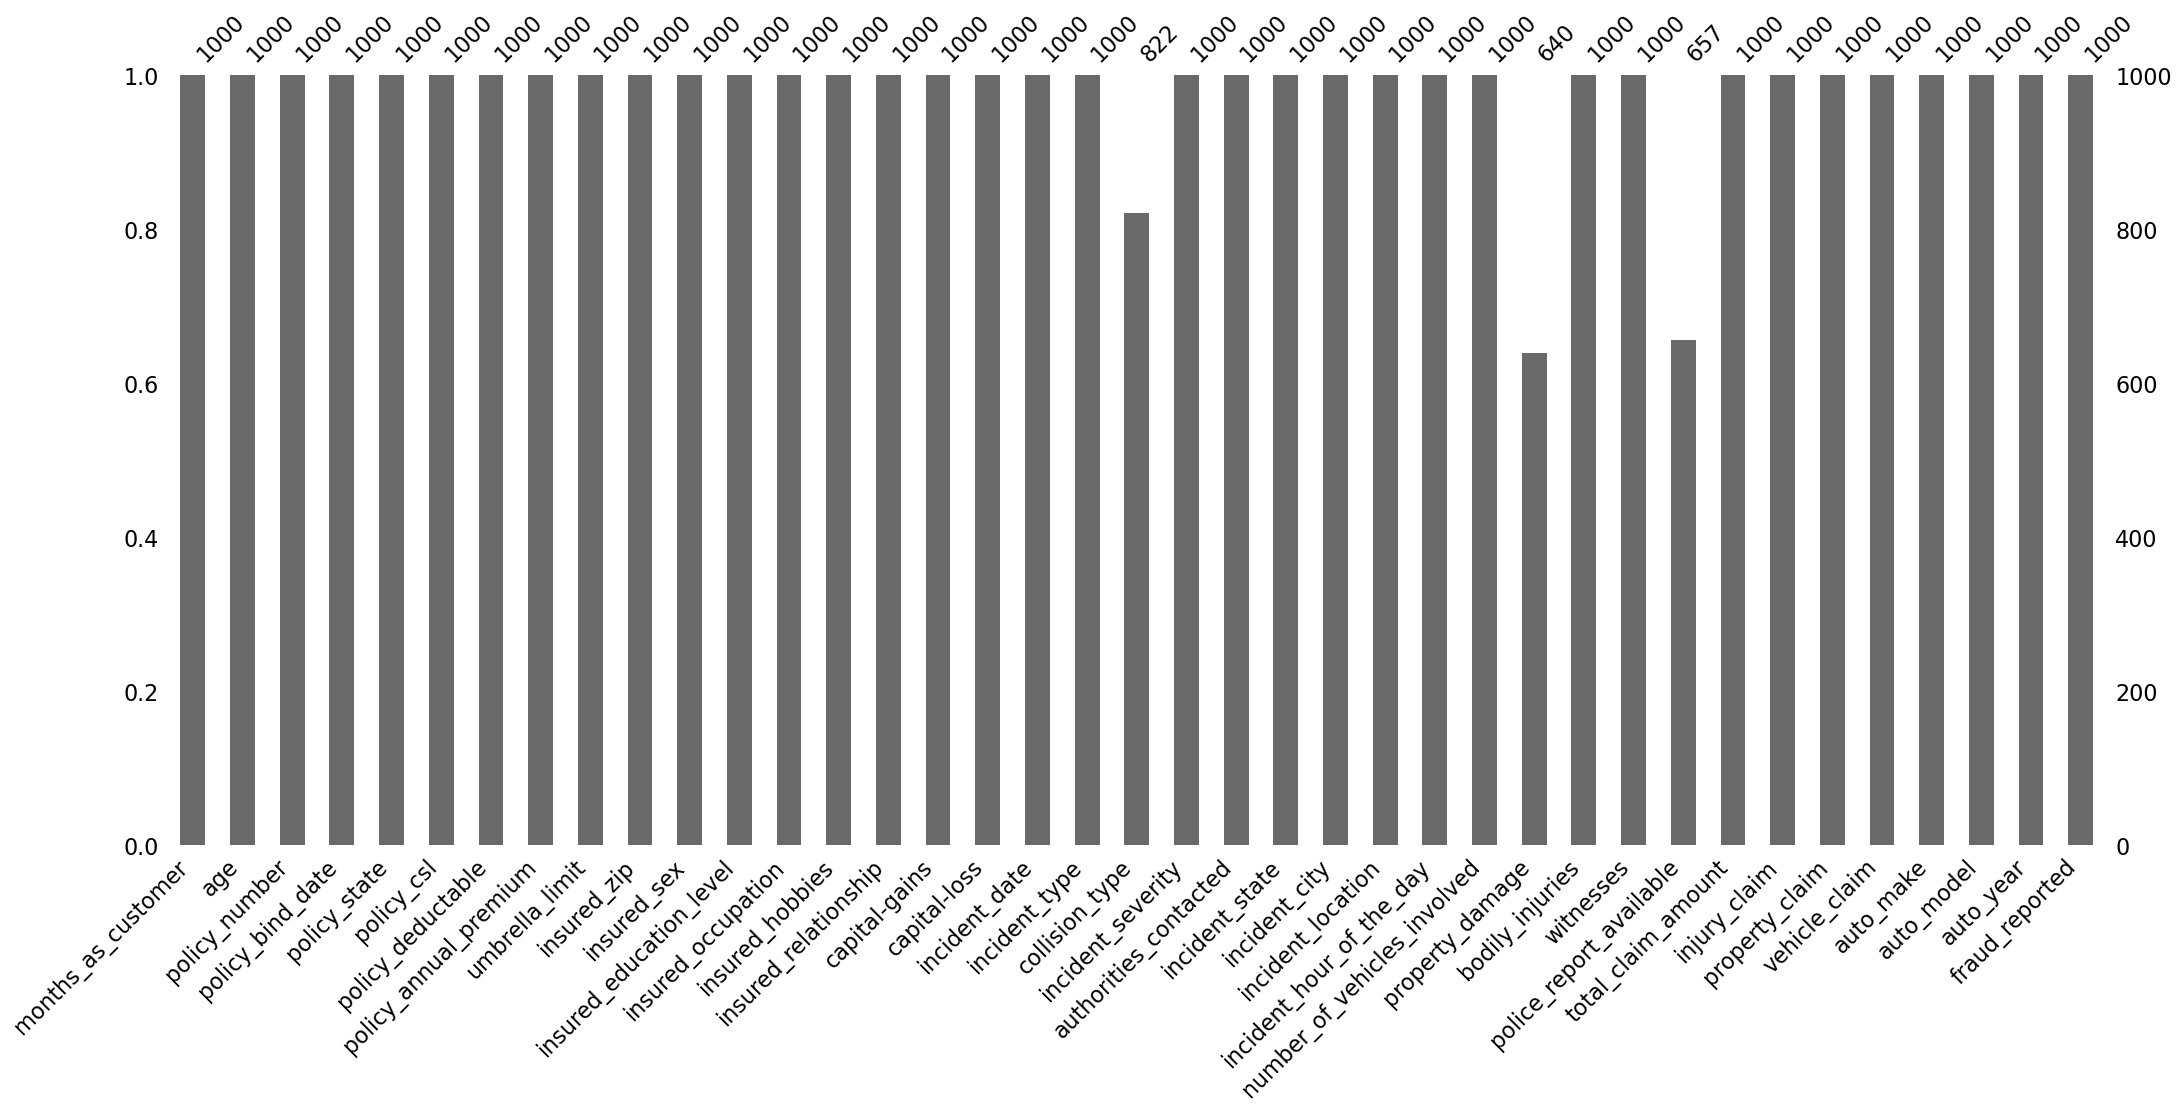

In [11]:
import missingno as msno
msno.bar(df)

We notive the below columns have missing values 
,collision_type
,property_damage
,police report available 


In [12]:
#Check on th dtpe of the columns with missing values
print(df["collision_type"].dtype)
print(df["property_damage"].dtype)
print(df["police_report_available"].dtype)

object
object
object


Since they are objects dtypes we add the missing values with mode 

In [13]:
df["collision_type"]=df["collision_type"].fillna(df["collision_type"].mode()[0])
df["property_damage"]=df["property_damage"].fillna(df["property_damage"].mode()[0])
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode()[0])

In [14]:
## Confirm if the dataset has null value
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

The data looks to be ok 

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Correlation Matrix on the numerical features

In [16]:
numerical_df=df.select_dtypes(include=["int64", "float64"])
numerical_df

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


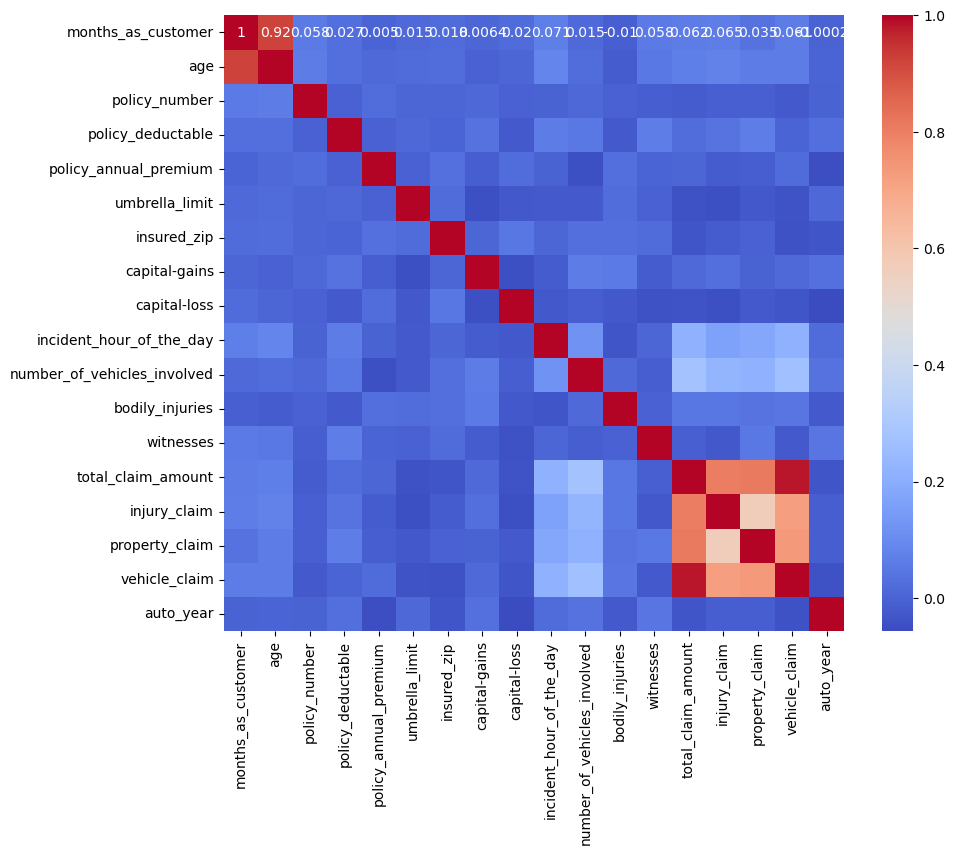

In [17]:
corr=numerical_df.corr()
corr

#plot a correlatiion matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Based on the heatmap, we can see that there is some form of correlation between the following variables:
1) `month_as_customer` and `age`
2) `vehicle_claim` and `injury_claim`
3) `vehicle_claim` and `property_claim`
4) `property_claim` and `injury_claim`


Realistically, we can see that `total_claim_amount` is the total sum of `vehicle_claim`,`property_claim`,`injury_claim` thus we will drop it. 
We will also drop `age` column


In [18]:
numerical_df.drop(['total_claim_amount','age'],inplace=True,axis=1)

In [19]:
numerical_df.nunique()

months_as_customer              391
policy_number                  1000
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
capital-gains                   338
capital-loss                    354
incident_hour_of_the_day         24
number_of_vehicles_involved       4
bodily_injuries                   3
witnesses                         4
injury_claim                    638
property_claim                  626
vehicle_claim                   726
auto_year                        21
dtype: int64

In [20]:
#Drop the unnecessary columns in the numerical data
num_drop=['policy_number','insured_zip','auto_year']
numerical_df.drop(num_drop, inplace = True, axis=1)
numerical_df

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,1310.80,0,0,0,20,1,0,1,17440,8720,61040
996,285,1000,1436.79,0,70900,0,23,1,2,3,18080,18080,72320
997,130,500,1383.49,3000000,35100,0,4,3,2,3,7500,7500,52500
998,458,2000,1356.92,5000000,0,0,2,1,0,1,5220,5220,36540


In [21]:
numerical_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
0,328,1000,1406.91,0,53300,0,5,1,1,2,6510,13020,52080
1,228,2000,1197.22,5000000,0,0,8,1,0,0,780,780,3510
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,7700,3850,23100
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,6340,6340,50720
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,1300,650,4550


##### Check for outliers in the numerical data

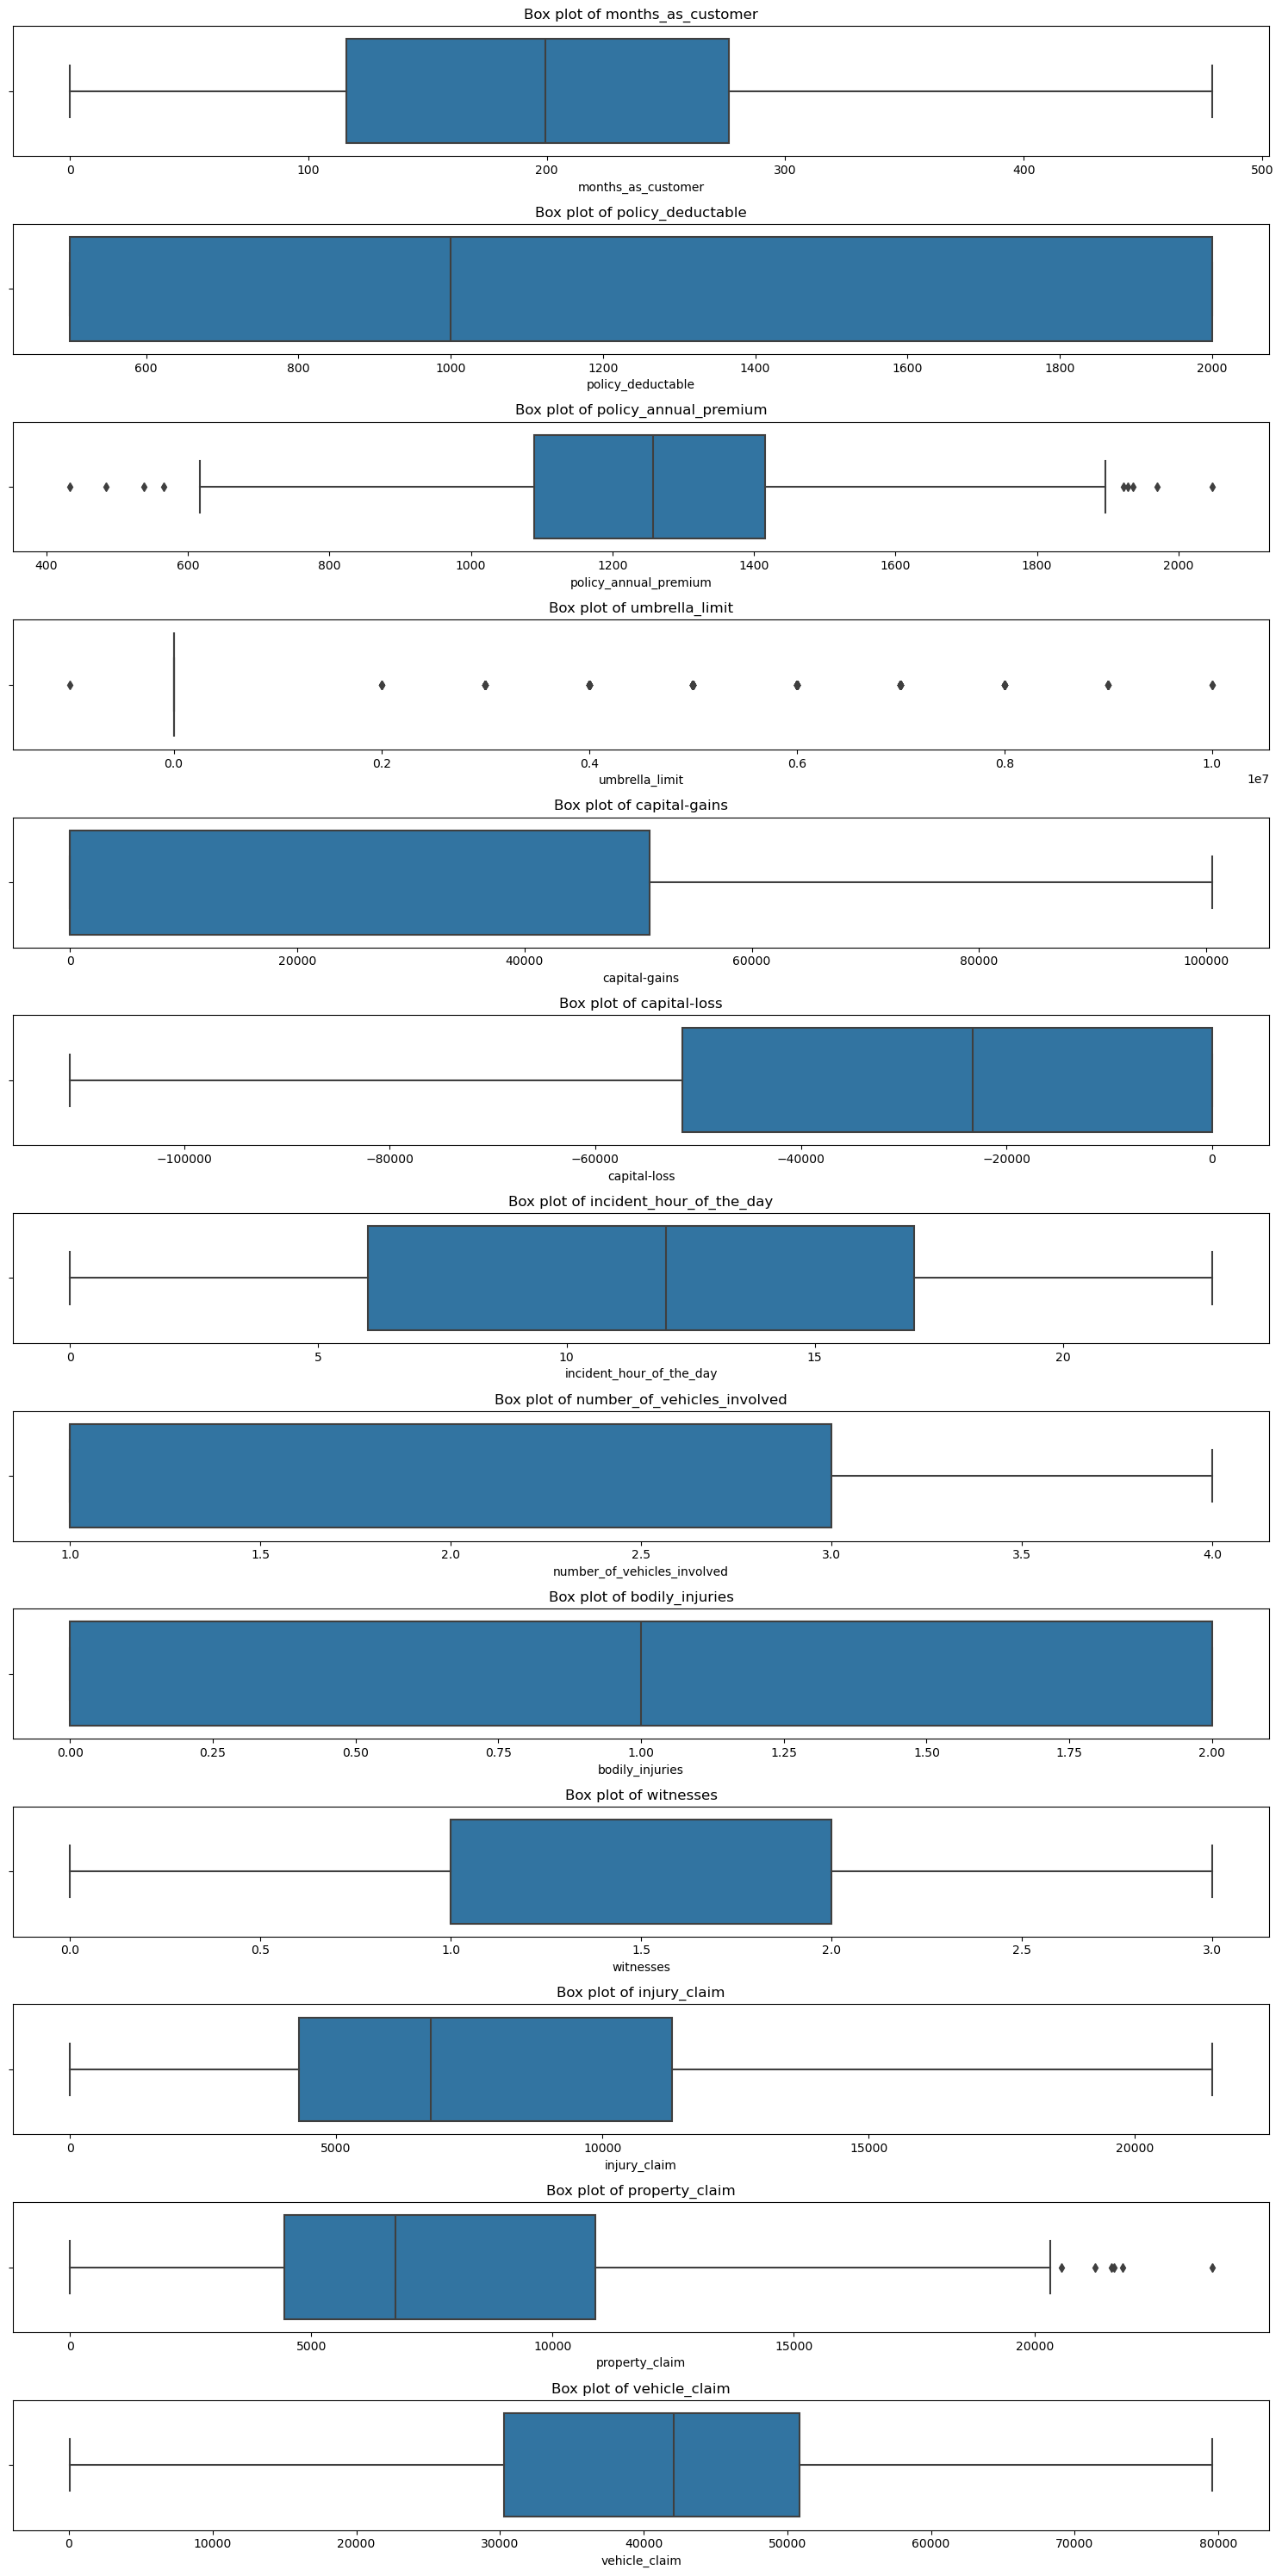

In [22]:
# Plotting box plots for each numeric column
plt.figure(figsize=(15, 30))  

for i, column in enumerate(numerical_df.columns, 1):
    plt.subplot(len(numerical_df.columns), 1, i)
    sns.boxplot(x=numerical_df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()  

plt.show()

We notice outliers in the below columns:
   1) `policy_annual_premium`
   2) `umbrella_limit`
   3) `property_claim`
We will scale the numerical_df

#### Check for normality

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


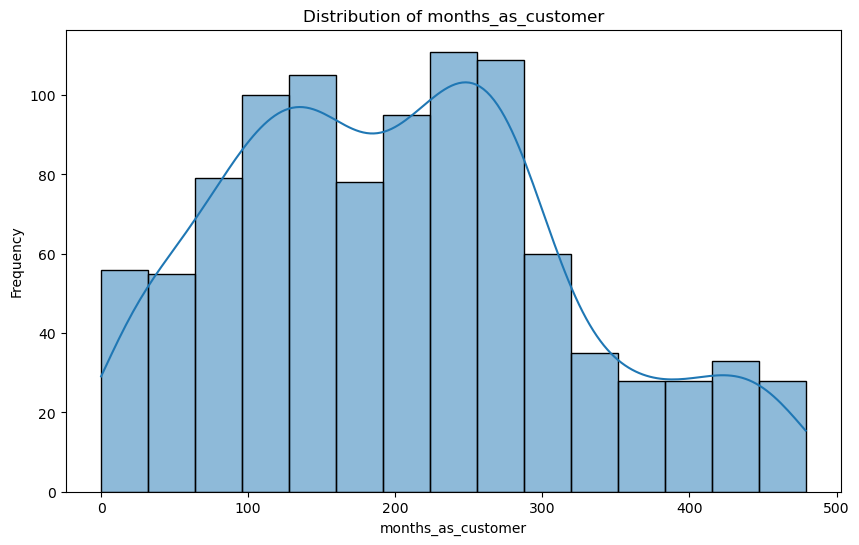

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


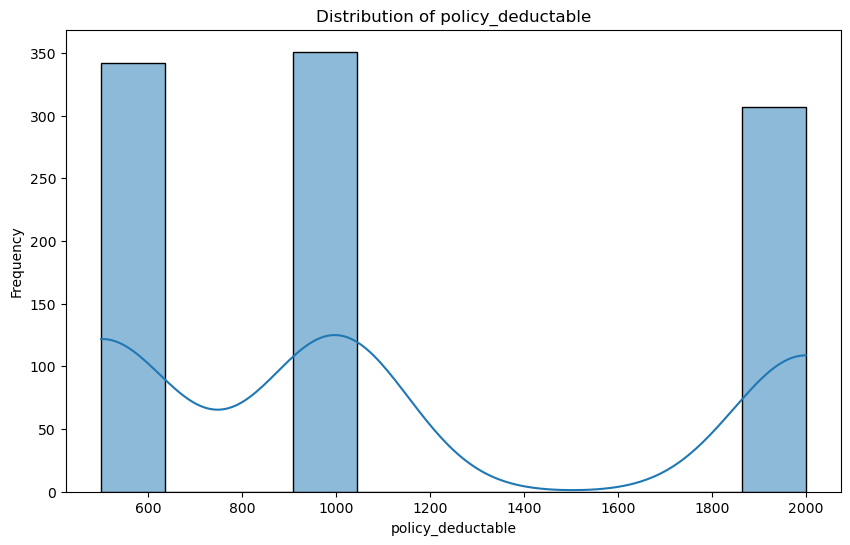

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


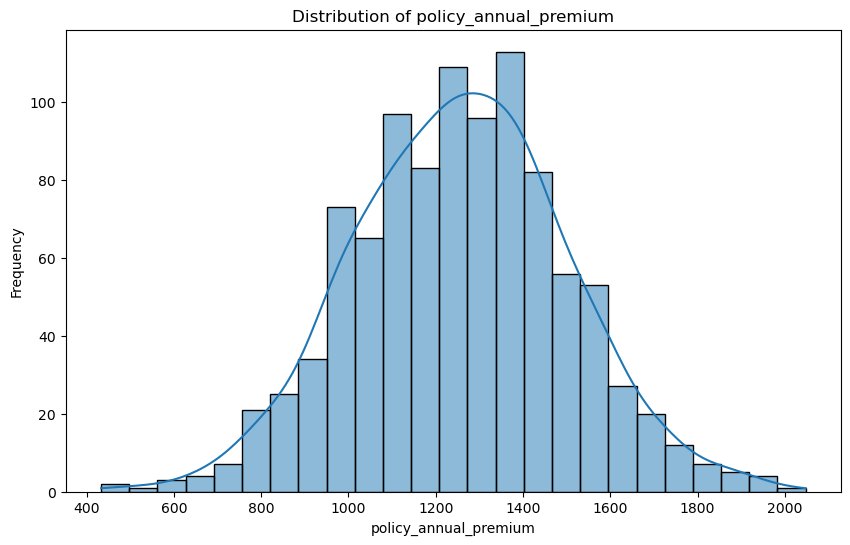

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


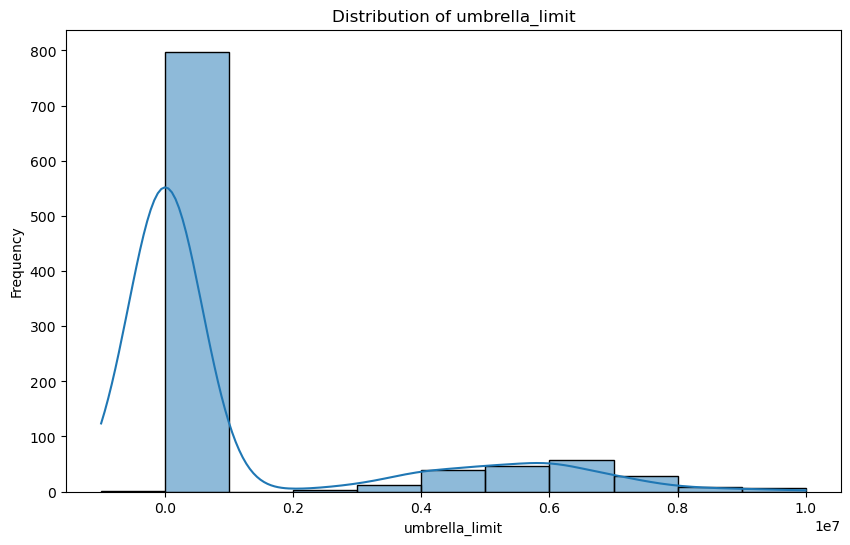

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


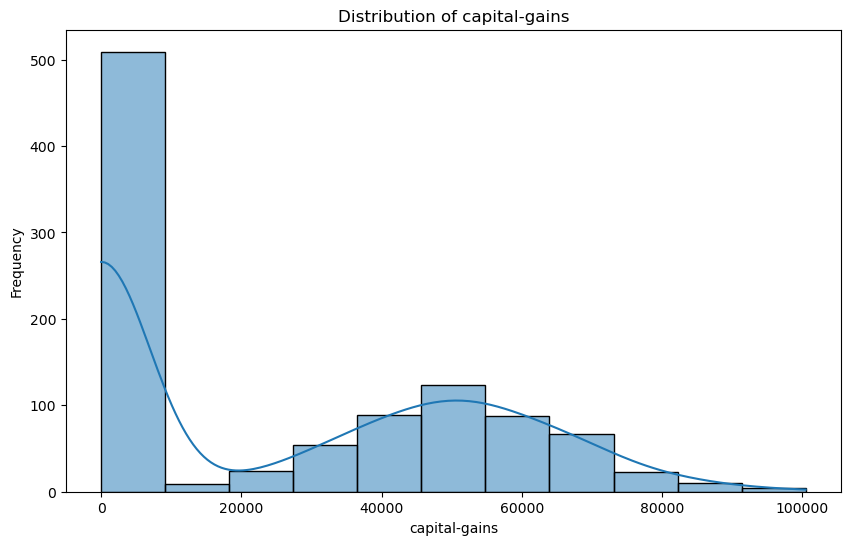

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


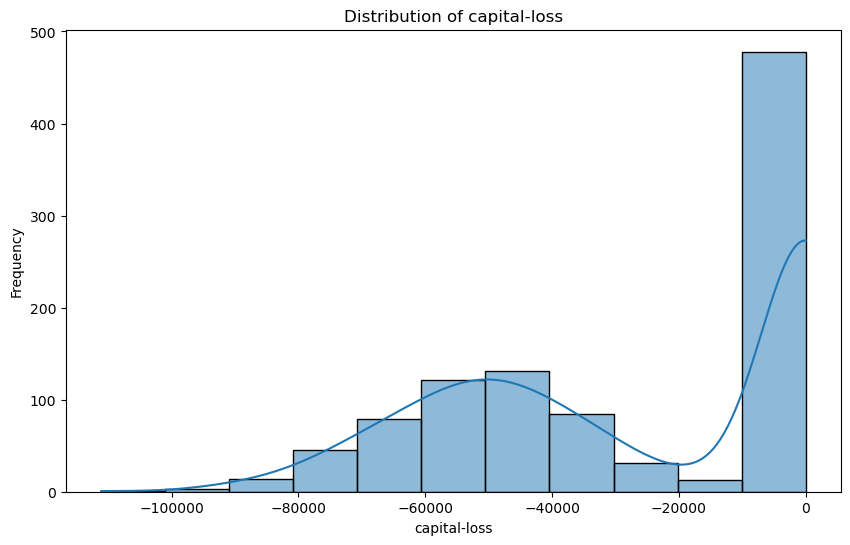

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


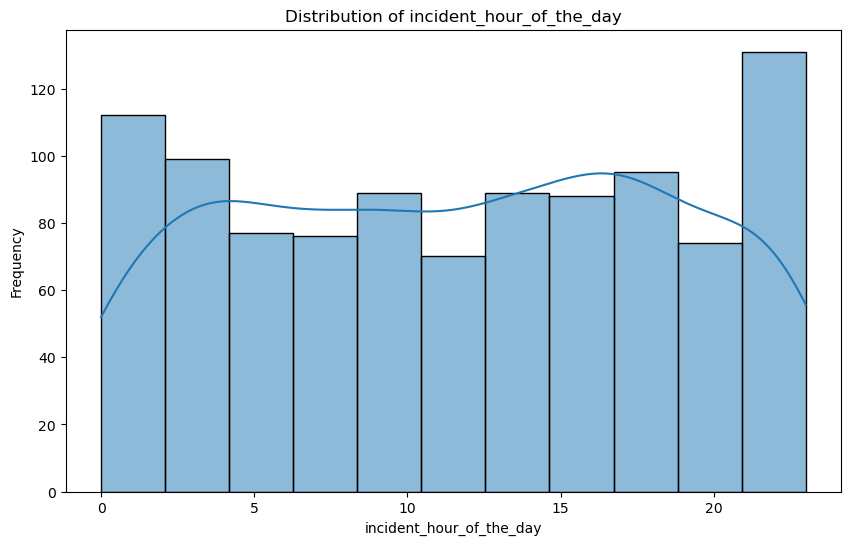

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


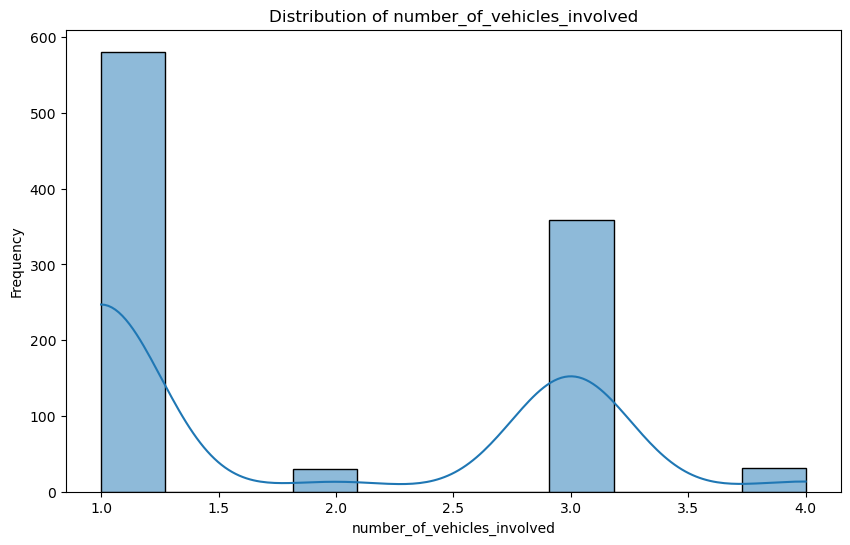

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


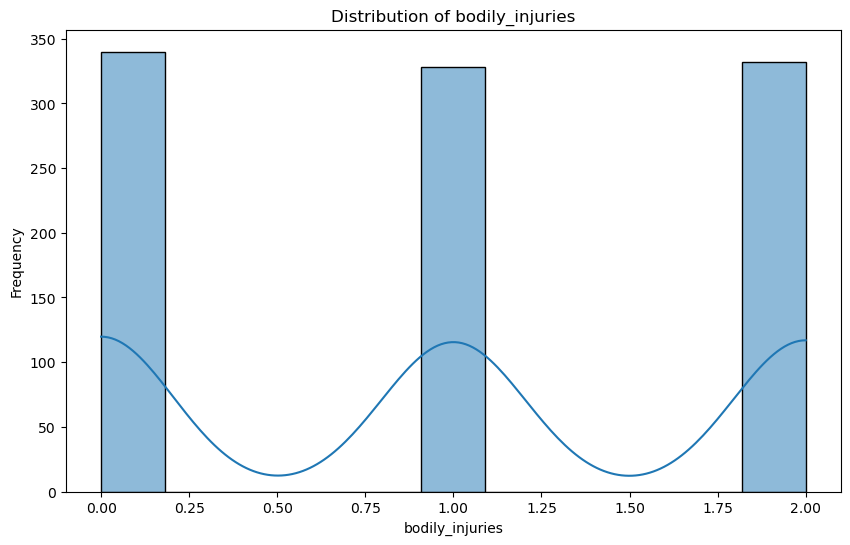

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


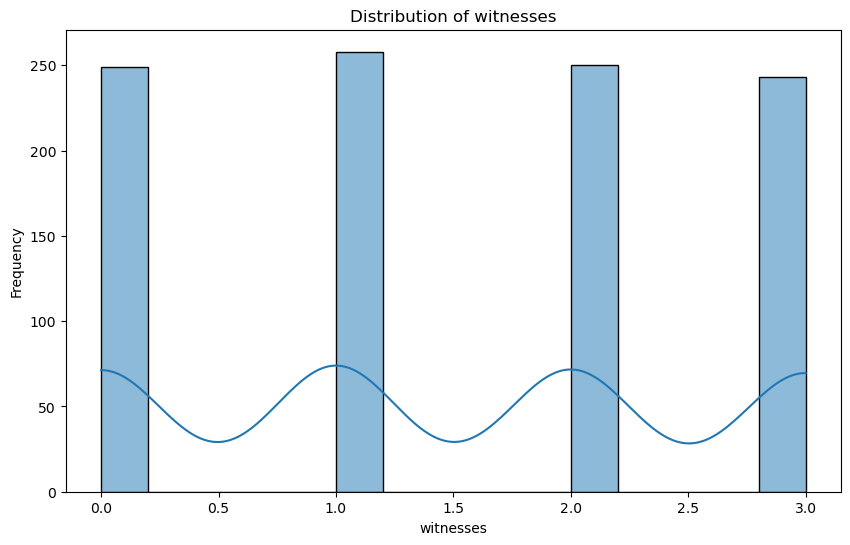

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


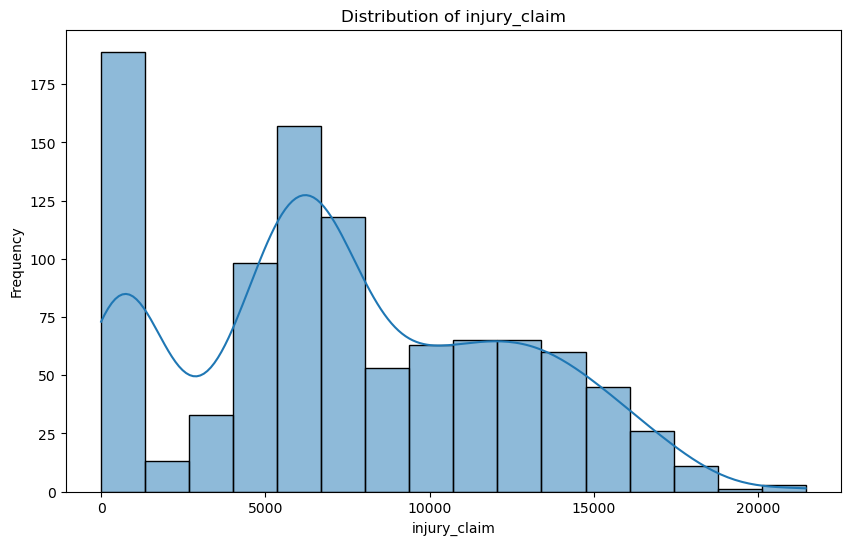

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


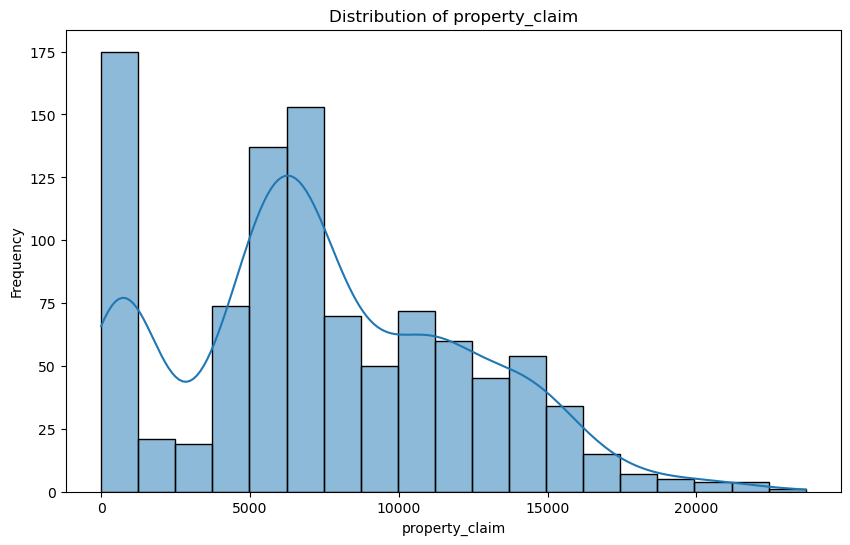

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


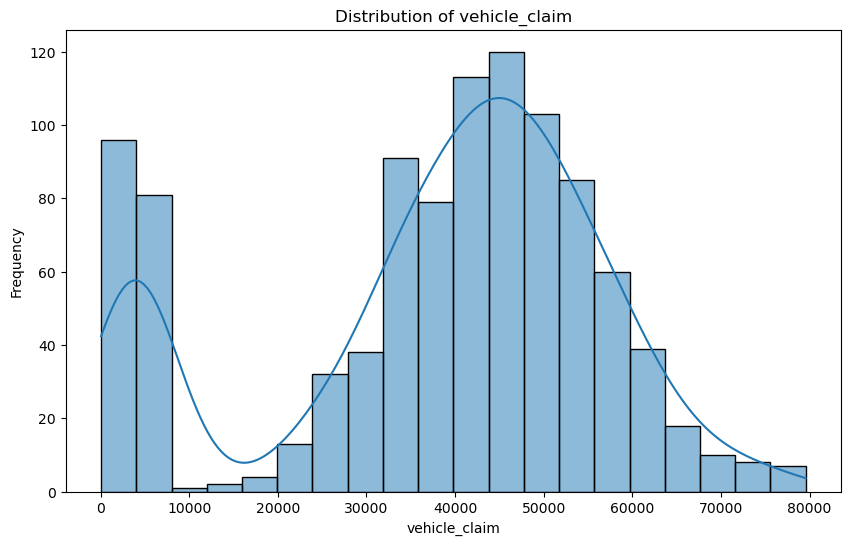

In [23]:
for column in numerical_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(numerical_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

 Most of the data in the numerical_df looks normally distributed with a few exceptions

## Check the categorical data

In [24]:
categ_data=df.select_dtypes(include=['object'])
categ_data

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,...,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2014-10-17,OH,250/500,MALE,MD,craft-repair,sleeping,husband,2015-01-25,Single Vehicle Collision,...,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,2006-06-27,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,2015-01-21,Vehicle Theft,...,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,Y
2,2000-09-06,OH,100/300,FEMALE,PhD,sales,board-games,own-child,2015-02-22,Multi-vehicle Collision,...,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,1990-05-25,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,2015-01-10,Single Vehicle Collision,...,Major Damage,Police,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,Y
4,2014-06-06,IL,500/1000,MALE,Associate,sales,board-games,unmarried,2015-02-17,Vehicle Theft,...,Minor Damage,Police,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1991-07-16,OH,500/1000,FEMALE,Masters,craft-repair,paintball,unmarried,2015-02-22,Single Vehicle Collision,...,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,YES,NO,Honda,Accord,N
996,2014-01-05,IL,100/300,FEMALE,PhD,prof-specialty,sleeping,wife,2015-01-24,Single Vehicle Collision,...,Major Damage,Fire,SC,Northbend,3092 Texas Drive,YES,NO,Volkswagen,Passat,N
997,2003-02-17,OH,250/500,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,2015-01-23,Multi-vehicle Collision,...,Minor Damage,Police,NC,Arlington,7629 5th St,NO,YES,Suburu,Impreza,N
998,2011-11-18,IL,500/1000,MALE,Associate,handlers-cleaners,base-jumping,wife,2015-02-26,Single Vehicle Collision,...,Major Damage,Other,NY,Arlington,6128 Elm Lane,NO,YES,Audi,A5,N


In [25]:
#Check on the categorical data
categ_data.nunique()

policy_bind_date            951
policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_date                60
incident_type                 4
collision_type                3
incident_severity             4
authorities_contacted         4
incident_state                7
incident_city                 7
incident_location          1000
property_damage               2
police_report_available       2
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

In [26]:
#drop columns that arenot useful
categ_drop = ['policy_bind_date','policy_state','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model']
categ_data.drop(categ_drop, inplace=True, axis=1)

In [27]:
### Check on the unique variables
def unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in categorical column :\n{column}':{unique_values}\n")

unique_values(categ_data)

Unique values in categorical column :
policy_csl':['250/500' '100/300' '500/1000']

Unique values in categorical column :
insured_sex':['MALE' 'FEMALE']

Unique values in categorical column :
insured_education_level':['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

Unique values in categorical column :
insured_occupation':['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

Unique values in categorical column :
insured_relationship':['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

Unique values in categorical column :
incident_type':['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

Unique values in categorical column :
collision_type':['Side Collision' 'Rear Collision' 'Front Collision']

Unique values in categorical column :

We encode the categorical part of the data

In [28]:
### Check on the unique variables of the categorical data
print("unique data:",categ_data.nunique())

unique data: policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_relationship        6
incident_type               4
collision_type              3
incident_severity           4
authorities_contacted       4
property_damage             2
police_report_available     2
fraud_reported              2
dtype: int64


In [29]:
categ_data=pd.get_dummies(categ_data,drop_first=True)

In [30]:
categ_data.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,True,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,True,True,True
1,True,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,True
4,False,True,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


Merge the numerical_df and the categ_data to form one dataframe

In [37]:
insurance_df=pd.concat([numerical_df,categ_data],axis=1)

In [38]:
insurance_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES,fraud_reported_Y
0,328,1000,1406.91,0,53300,0,5,1,1,2,...,True,False,False,False,False,False,True,True,True,True
1,228,2000,1197.22,5000000,0,0,8,1,0,0,...,False,True,False,False,False,False,True,False,False,True
2,134,2000,1413.14,5000000,35100,0,7,3,2,3,...,False,True,False,False,False,False,True,False,False,False
3,256,2000,1415.74,6000000,48900,-62400,5,1,1,2,...,False,False,False,False,False,False,True,False,False,True
4,228,1000,1583.91,6000000,66000,-46000,20,1,0,1,...,False,True,False,False,False,False,True,False,False,False


In [39]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      1000 non-null   int64  
 1   policy_deductable                       1000 non-null   int64  
 2   policy_annual_premium                   1000 non-null   float64
 3   umbrella_limit                          1000 non-null   int64  
 4   capital-gains                           1000 non-null   int64  
 5   capital-loss                            1000 non-null   int64  
 6   incident_hour_of_the_day                1000 non-null   int64  
 7   number_of_vehicles_involved             1000 non-null   int64  
 8   bodily_injuries                         1000 non-null   int64  
 9   witnesses                               1000 non-null   int64  
 10  injury_claim                            1000 non-null   int64

In [41]:
X=insurance_df.drop(['fraud_reported_Y'], axis = 1)
y=insurance_df['fraud_reported_Y']

#### Train_Test_split

Separate the train and test data

In [42]:

from sklearn.model_selection import train_test_split
#split the train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [54]:
X_train.index.shape

(750,)

Standardise the training data 

In [45]:
num_X_train=X_train.select_dtypes(include=['int64','float'])

In [52]:
num_X_train.shape

(750, 13)

In [58]:
print(num_X_train.columns)
print(X_train.index[:5])  

Index(['months_as_customer', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')
Index([706, 789, 606, 509, 931], dtype='int64')


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_X_train)

In [53]:
scaled_data.shape

(750, 13)

The scaled_data is a numpy array,we change it to a dataframe 

In [60]:
#Create a dataframe
scaled_df=pd.DataFrame(data=scaled_data, columns=num_X_train.columns, index= X_train.index)
scaled_df

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
706,0.488583,-0.249517,0.146571,-0.493983,-0.920796,0.954348,0.754117,-0.838848,1.219050,1.357121,1.176616,-0.179825,1.124433
789,-0.327168,-1.066711,0.871986,-0.493983,-0.920796,-1.077581,-1.704960,-0.838848,-1.225569,-1.352305,0.052029,-0.757387,-0.595769
606,-0.839183,-0.249517,1.676667,-0.493983,-0.920796,-1.380959,-1.271005,-0.838848,-1.225569,1.357121,-0.356352,-0.361104,0.408213
509,-0.700331,1.384873,-1.413622,-0.493983,1.069034,-1.105802,0.609465,1.111961,1.219050,-1.352305,-0.268109,1.032211,0.918964
931,-0.726366,1.384873,0.048190,-0.493983,-0.341478,-1.204577,0.175511,1.111961,-0.003259,-0.449163,-0.276317,-1.573140,0.573862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.627434,-1.066711,0.985932,-0.493983,0.421350,-0.163918,0.609465,1.111961,1.219050,1.357121,-1.536347,-0.814300,-0.696114
569,-0.361881,-1.066711,-1.480131,2.037819,-0.920796,-0.805952,-0.547747,-0.838848,-0.003259,1.357121,-0.105988,-0.103941,0.926397
453,-1.620221,-1.066711,0.923138,-0.493983,0.266625,-0.583709,0.464814,1.111961,1.219050,-0.449163,-0.151135,-0.150315,0.474579
271,0.558009,-0.249517,-0.028435,-0.493983,1.641155,0.954348,-0.837051,-0.838848,-1.225569,-1.352305,-1.421426,-1.514119,-1.915121


In [64]:
# Assuming scaled_df contains scaled versions of some columns in X_train
# Drop columns from X_train that are present in scaled_df
X_train.drop(columns=scaled_df, inplace =True )


In [65]:
X_train=pd.concat([scaled_df,X_train],axis=1)

In [66]:
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
706,0.488583,-0.249517,0.146571,-0.493983,-0.920796,0.954348,0.754117,-0.838848,1.219050,1.357121,...,True,False,True,False,False,True,False,False,True,True
789,-0.327168,-1.066711,0.871986,-0.493983,-0.920796,-1.077581,-1.704960,-0.838848,-1.225569,-1.352305,...,True,False,True,False,False,True,False,False,False,True
606,-0.839183,-0.249517,1.676667,-0.493983,-0.920796,-1.380959,-1.271005,-0.838848,-1.225569,1.357121,...,False,True,False,True,False,False,False,False,False,False
509,-0.700331,1.384873,-1.413622,-0.493983,1.069034,-1.105802,0.609465,1.111961,1.219050,-1.352305,...,True,False,False,True,False,False,False,True,True,False
931,-0.726366,1.384873,0.048190,-0.493983,-0.341478,-1.204577,0.175511,1.111961,-0.003259,-0.449163,...,False,True,False,True,False,True,False,False,False,False


## Modelling